In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.__version__

'1.15.0'

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002686C414A48>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002686D083188>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002686D083508>)

In [5]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [6]:
mnist.train.labels[0], mnist.train.labels[0].shape

(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), (10,))

In [7]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [8]:
mnist.validation.images.shape

(5000, 784)

In [9]:
import numpy as np
from matplotlib import pyplot as plt

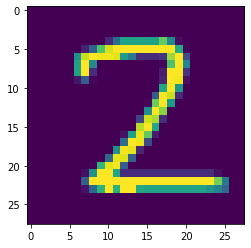

In [10]:
image = mnist.train.images[400]
image = np.array(image, dtype='float')
image = image.reshape((28,28))
plt.imshow(image)
plt.show()

In [24]:
n_input=784
n_hidden_1=1600
n_hidden_2=1600
n_output=10

weights={
    'h1' : tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'op' : tf.Variable(tf.random_normal([n_hidden_2,n_output]))
}

biases={
    'h1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'op' : tf.Variable(tf.random_normal([n_output]))
}

In [25]:
tf.trainable_variables()
#All variables by default are trainable and thus the optimizer only chooses those variables which are trainable.
#If we dont want a particular variable to be used in optimization we write- trainable=False

[<tf.Variable 'Variable:0' shape=(784, 784) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(784, 784) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(784, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(784,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(784,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(784, 1600) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(1600, 1600) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(1600, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(1600,) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(1600,) dtype=float32_ref>,
 <tf.Variable 'Variable_11:0' shape=(10,) dtype=float32_ref>]

In [26]:
def forward_propagation(x,weights,biases):
    in_h1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    op_h1=tf.nn.relu(in_h1)
    
    in_h2=tf.add(tf.matmul(op_h1,weights['h2']),biases['h2'])
    op_h2=tf.nn.relu(in_h2)
    
    op=tf.add(tf.matmul(op_h2,weights['op']),biases['op'])
    return op

In [27]:
x=tf.placeholder("float",[None,n_input])
y=tf.placeholder(tf.int32,[None,n_output])
pred=forward_propagation(x,weights,biases)
pred

<tf.Tensor 'Add_5:0' shape=(?, 10) dtype=float32>

In [28]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred ,labels=y))
cost

<tf.Tensor 'Mean_2:0' shape=() dtype=float32>

In [29]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.001)
optimize=optimizer.minimize(cost)

In [30]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 784) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(784, 784) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(784, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(784,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(784,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(784, 1600) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(1600, 1600) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(1600, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(1600,) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(1600,) dtype=float32_ref>,
 <tf.Variable 'Variable_11:0' shape=(10,) dtype=float32_ref>]

In [31]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [32]:
##Using Batch Gradient
batch_size=100
for i in range(250):
    num_batches=int(mnist.train.num_examples/batch_size)
    total_cost=0
    for j in range(num_batches):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        c,_=sess.run([cost,optimize], feed_dict={x:batch_x, y:batch_y})
        total_cost+=c
    print(i,total_cost)

0 294986.1792573929
1 71520.94587147236
2 36910.79714266356
3 21702.1135483456
4 14347.357352530584
5 9888.149666721933
6 8976.034806737402
7 8189.476840791404
8 7397.983735307478
9 6991.846617314695
10 6614.179242072569
11 5590.301305555253
12 4707.7592381341765
13 5135.566641871334
14 4353.274676332516
15 3742.9952764944537
16 3347.9008555842593
17 4965.157938446384
18 2876.327523001212
19 3551.096806548671
20 2888.213358838111
21 2692.8109650981496
22 2991.078530468637
23 2365.497397683561
24 3449.289495870471
25 2413.025929812884
26 1523.3095471036845
27 2474.210523340769
28 2012.3849466603995
29 2306.5608729720116
30 1734.0708887577057
31 961.787576297158
32 2070.1007939454867
33 2125.6961192414165
34 1797.4282768886674
35 1330.672046005428
36 1618.5736195106806
37 1588.205555152148
38 1291.6860921368793
39 1573.7911644428968
40 1616.8779155945779
41 2036.4040793702006
42 892.2417218610644
43 1164.38434802399
44 1334.888000779174
45 1067.3002789579518
46 749.211874619194
47 1407.5

In [33]:
##Without using batch gradient and iterations
#c,_=sess.run([cost,optimize], feed_dict={x:mnist.train.images, y:mnist.train.labels})
#c

In [34]:
n_pred=tf.argmax(pred,axis=1)
n_labels=tf.argmax(y,axis=1)
n_correct=tf.equal(n_pred,n_labels)

In [35]:
pred_eval,labels_eval,correct_pred=sess.run([n_pred,n_labels,n_correct], feed_dict={x:mnist.train.images, y:mnist.train.labels})
pred_eval,labels_eval,correct_pred

(array([8, 2, 4, ..., 8, 3, 2], dtype=int64),
 array([8, 2, 4, ..., 8, 3, 2], dtype=int64),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [36]:
correct_pred.sum()

54996

In [37]:
#Accuracy
Accuracy=100*(correct_pred.sum()/mnist.train.num_examples)
print(Accuracy,"%")

99.99272727272728 %
